## EDA for Telegram News Channels data
Date: 13.05.2024

Summary:
1. The dataset contains information about 965 channels with 1 584 437 posts.
2. There are 354 491 duplications of the posts.
3. The majority of the posts are in Ukrainians (1 274 154) and in Russian (466 962).
4. The data are from three months: October, November and December of 2023. The number of posts is almost equal during these months.
5. The number of posts per channel is not balanced. On average, each channel has 1164 posts. The largest amount of the messages (more than 15 000) have channels "ПОЛУАВТОБИЯ" and "Бабуся Світуся Новини 24/7".
6. The number of subscribers per channel is right-skewed with a long tail. There are only 5 channels with the number of subscribers more than million: "Труха Україна" (2 616 144 sub.), "Николаевский Ванёк" (1 943 429 sub), "Реальна війна Україна" (1 346 813 sub), "Всевидящее ОКО Украина Новости" (1 134 514 sub), "Реальний Київ Україна" (1 122 447 sub). There are 14 channels that have more than 500,500 subscribers, 137 channels that have more than 100,000 subscribers, others have fewer. 
7. The average number of tokens per post is 38 tokens. The majority length of the messages is from 5 to 15 tokens.
8. There are 128,722 messages from 60 pro-Russian channels in the dataset.

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [3]:
! pip install langdetect
from langdetect import detect

#### Data opening

In [4]:
root_dir = 'C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/teleg_news_channels'
file_path = os.path.join(root_dir, "data_no_alarm_messages_no_ads.csv")
df = pd.read_csv(file_path, usecols=["channel_id","channel_name","message_create_date","message_last_edit_date","message_content", "name", "n_participants"])

In [5]:
df

,channel_id,channel_name,message_create_date,message_last_edit_date,message_content,name,n_participants
0,1537775739,Info_Ba_News,2023-10-01 18:14:17,2023-10-01 18:15:51,🙏Просимо бути не байдужими та підтримати! По 1...,Типова Балаклія Новини,10 800
1,1537775739,Info_Ba_News,2023-10-01 18:13:33,2023-10-01 18:15:42,"Добрий вечір, друзі!\n\nНагадуємо, що триває з...",Типова Балаклія Новини,10 800
2,1537775739,Info_Ba_News,2023-10-01 18:29:42,2023-10-01 18:30:44,"📹Інтервʼю з бійцем, який здирав з рекламного щ...",Типова Балаклія Новини,10 800
3,1537775739,Info_Ba_News,2023-10-01 19:55:35,2023-10-01 19:56:54,"❗️1 жовтня, близько 15:00, у с. Донець комбайн...",Типова Балаклія Новини,10 800
4,1537775739,Info_Ba_News,2023-10-01 20:10:55,2023-10-01 20:11:19,"Дякуємо всім, хто підтримує! Моя повага!🤝",Типова Балаклія Новини,10 800
...,...,...,...,...,...,...,...
1597449,1690288574,U24INFORM,2023-10-30 14:15:24,2023-10-30 14:15:35,🗣 Це жахливі кадри. І світ має їх бачити. Росі...,U24 Інформ Новини Україна Війна,12 938
1597450,1690288574,U24INFORM,2023-10-30 14:16:09,2023-10-30 14:22:35,ВЕСЬ КОНТЕНТ В НАШОМУ ОСНОВНОМУ КАНАЛІ !\n\n🔻🔻...,U24 Інформ Новини Україна Війна,12 938
1597451,1690288574,U24INFORM,2023-10-30 18:06:13,2023-10-30 18:06:25,🔞🔞🔞 Розстріл сплячої родини у Волновасі. Серед...,U24 Інформ Новини Україна Війна,12 938
1597452,2100374308,dacuk_4308,2023-11-24 12:30:10,NaN,Основная страніца канала - https://t.me/+6kDjV...,ДАЦИК 4308,12 830


In [8]:
df.isnull().sum(axis=0)

channel_id                     0
channel_name                   0
message_create_date            0
message_last_edit_date    395855
message_content                0
name                           0
n_participants                 0
dtype: int64

#### Clean text

In [9]:
def clean_text(text):
    # Remove newline characters, carriage returns, and repr symbols
    cleaned_text = re.sub(r'[\n\r\t\\]+', ' ', text)
    # Remove multiple spaces 
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Clean the messages from all emojis
    pattern = r'[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251&&[^\uFF01-\uFF5E]]+'
    cleaned_text = re.sub(pattern, '', cleaned_text)
    # Remove URLs
    cleaned_text = re.sub(r'http[s]?://\S+', '', cleaned_text)
    return cleaned_text

In [10]:
# Clean messages text
df["message_content_clean"] = df["message_content"].apply(lambda x: clean_text(x))

C:\Windows\Temp\ipykernel_9812\3759801633.py:8: FutureWarning: Possible set intersection at position 232
  cleaned_text = re.sub(pattern, '', cleaned_text)


In [11]:
# Remove everything except for text, numbers and punctuation
punctuation = "!*(),-.:;?%\'\"\/"
russian_letters = u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"
ukrainian_alphabet = u"АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯабвгґдеєжзиіїйклмнопрстуфхцчшщьюя"
latin_letters_numbers = "1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ "
allowed_symbols = ukrainian_alphabet+russian_letters+latin_letters_numbers+punctuation

def clean_text2(text, allowed_symbols=allowed_symbols):
    getVals = list(filter(lambda x: x in allowed_symbols, text))
    cleaned_text = "".join(getVals)
    cleaned_text = re.sub(' +', ' ', cleaned_text)

    return cleaned_text

In [12]:
# Clean messages text
df["message_content_clean"] = df["message_content_clean"].apply(lambda x: clean_text2(x))

In [13]:
# Remove the messages that have less than 4 words
df['length'] = df['message_content_clean'].str.split().apply(len)
df = df[df["length"] > 4]

In [20]:
print("Number of posts:", len(df))

Number of posts: 1584437


In [15]:
# Clean name column
df["name"] = df["name"].apply(lambda x: clean_text(x))

C:\Windows\Temp\ipykernel_9812\2428308644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["name"] = df["name"].apply(lambda x: clean_text(x))


In [21]:
# Convert data to datetime
df['message_create_date'] = pd.to_datetime(df['message_create_date'])
# Convert n_participants to integer
df['n_participants'] = df["n_participants"].str.replace(' ', '')
df['n_participants'] = pd.to_numeric(df['n_participants'])

C:\Windows\Temp\ipykernel_9812\469538921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_create_date'] = pd.to_datetime(df['message_create_date'])
C:\Windows\Temp\ipykernel_9812\469538921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_participants'] = df["n_participants"].str.replace(' ', '')
C:\Windows\Temp\ipykernel_9812\469538921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [22]:
df.head()

,channel_id,channel_name,message_create_date,message_last_edit_date,message_content,name,n_participants,message_content_clean,length
0,1537775739,Info_Ba_News,2023-10-01 18:14:17,2023-10-01 18:15:51,🙏Просимо бути не байдужими та підтримати! По 1...,Типова Балаклія Новини,10800,Просимо бути не байдужими та підтримати! По 1 ...,9
1,1537775739,Info_Ba_News,2023-10-01 18:13:33,2023-10-01 18:15:42,"Добрий вечір, друзі!\n\nНагадуємо, що триває з...",Типова Балаклія Новини,10800,"Добрий вечір, друзі! Нагадуємо, що триває збір...",44
2,1537775739,Info_Ba_News,2023-10-01 18:29:42,2023-10-01 18:30:44,"📹Інтервʼю з бійцем, який здирав з рекламного щ...",Типова Балаклія Новини,10800,"Інтервю з бійцем, який здирав з рекламного щит...",20
3,1537775739,Info_Ba_News,2023-10-01 19:55:35,2023-10-01 19:56:54,"❗️1 жовтня, близько 15:00, у с. Донець комбайн...",Типова Балаклія Новини,10800,"1 жовтня, близько 15:00, у с. Донець комбайн п...",34
4,1537775739,Info_Ba_News,2023-10-01 20:10:55,2023-10-01 20:11:19,"Дякуємо всім, хто підтримує! Моя повага!🤝",Типова Балаклія Новини,10800,"Дякуємо всім, хто підтримує! Моя повага!",6


#### Channels exploration

In [23]:
# Shorter the name of the channels for better visualization
def shorten_name(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: ' '.join(x.split()[:7]))
    return df

In [24]:
df = shorten_name(df, 'name')

C:\Windows\Temp\ipykernel_9812\1556841149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: ' '.join(x.split()[:7]))


In [25]:
df["channel_name"].value_counts()

poluavtobia1           25322
babusya_svitusya       16033
svidok_telegram        11685
itsdonetsk             11519
UA_1NEWS               10890
                       ...  
adbestias                  3
UA_struggle                2
ivukr                      1
publicreservestugna        1
krvchkwar1                 1
Name: channel_name, Length: 965, dtype: int64

There are 965 unique channels.

Text(0, 0.5, 'Number of messages')

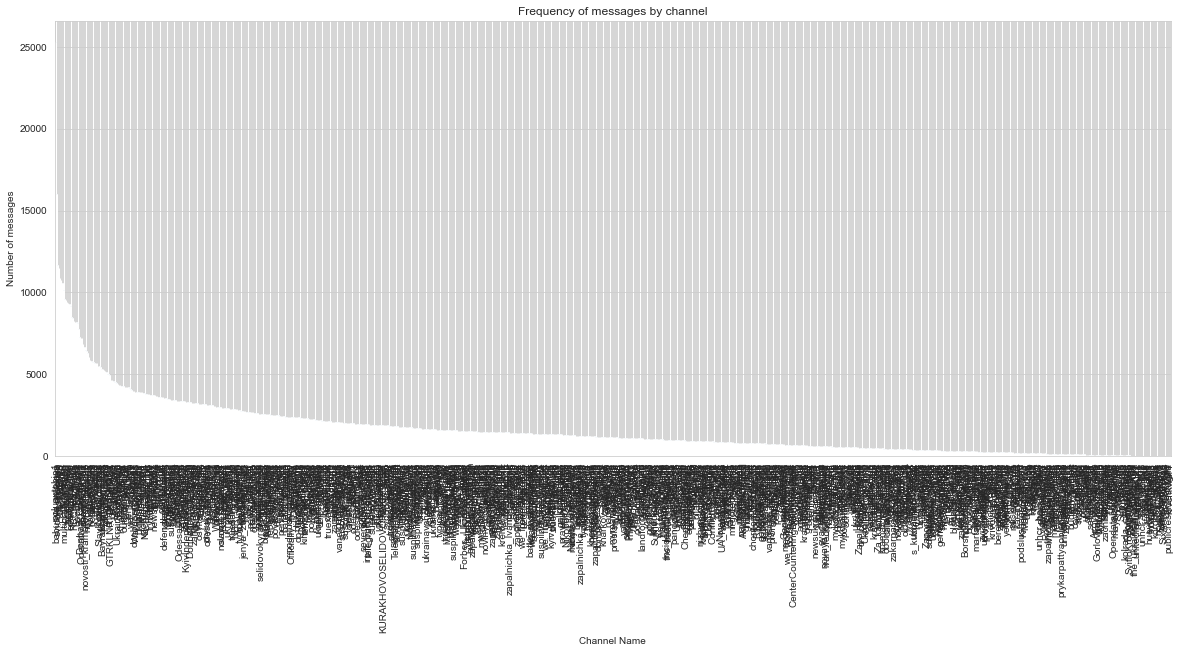

In [26]:
# Frequency of messages by channel
plt.figure(figsize=(20,8))
df["channel_name"].value_counts().plot(kind="bar")
plt.title("Frequency of messages by channel")
plt.xlabel("Channel Name")
plt.ylabel("Number of messages")

In [27]:
df["name"].value_counts().median()

1164.0

Some channels have more than 10K messages but some only view. The data is not normally distributed. The average messages for each channel (median) is 1164 messages. However, there are too many channels for a clear visualization. Therefore, we will analyze the channels with granularity below.

Text(0, 0.5, 'Frequency')

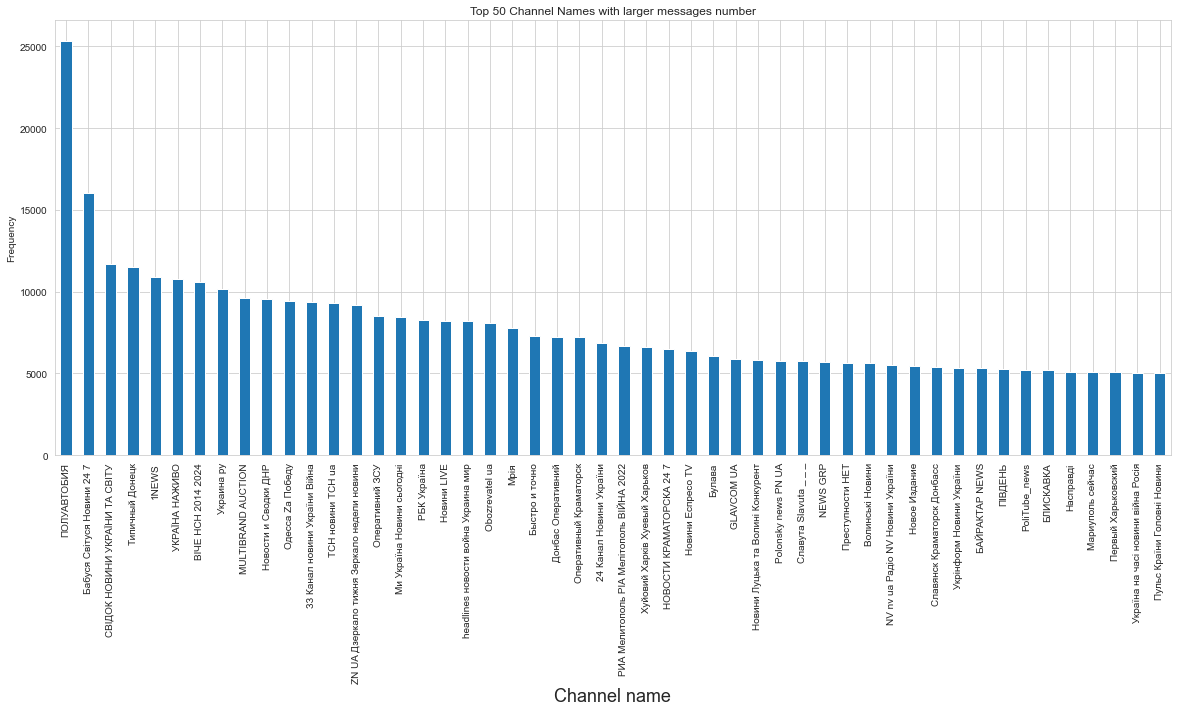

In [28]:
# Top 50 channels by number of messages
top_50_channels = df["name"].value_counts().nlargest(50)
plt.figure(figsize=(20,8))
top_50_channels.plot(kind="bar")
plt.title("Top 50 Channel Names with larger messages number")
plt.xlabel("Channel name", fontsize=18)
plt.ylabel("Frequency")

The largest amount of the messages have channels "ПОЛУАВТОБИЯ", "Бабуся Світуся Новини 24/7", and "СВІДОК НОВИНИ УКРАЇНИ ТА СВІТУ". 

Text(0, 0.5, 'Frequency')

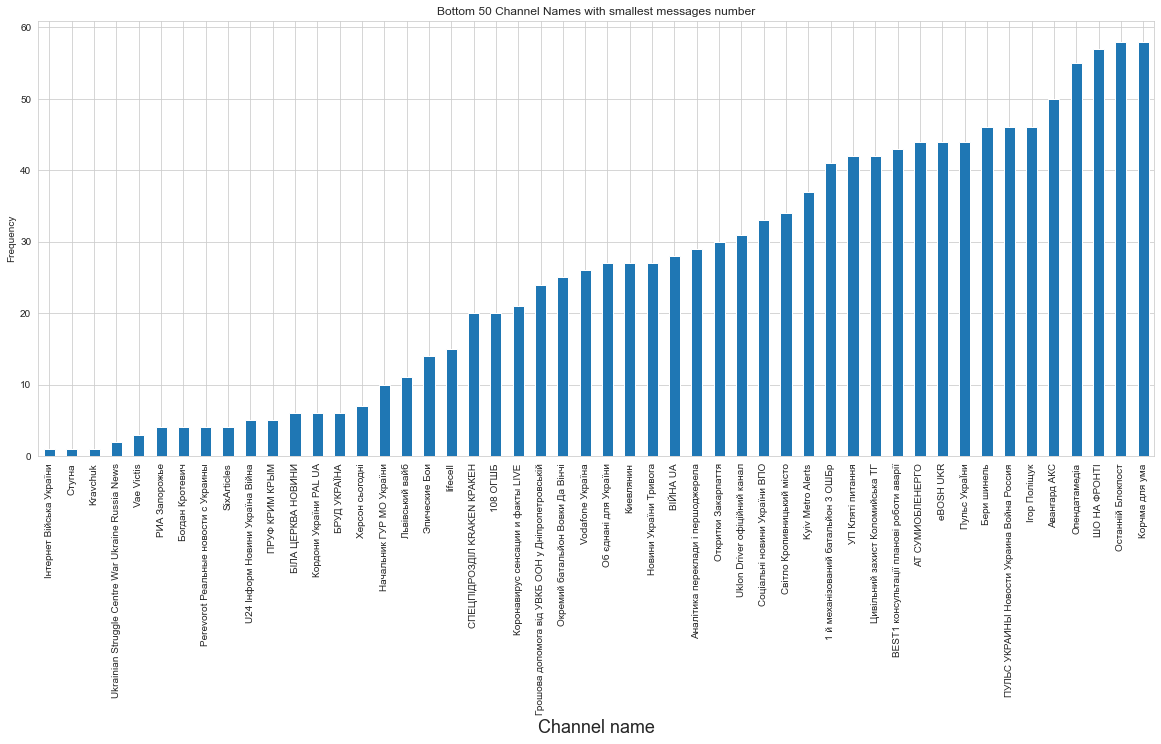

In [30]:
# Bottom 50 channels by number of messages
bottom_50_channels = df["name"].value_counts().nsmallest(50)
bottom_50_channels = bottom_50_channels.sort_values(ascending=True)
plt.figure(figsize=(20,8))
bottom_50_channels.plot(kind="bar")
plt.title("Bottom 50 Channel Names with smallest messages number")
plt.xlabel("Channel name", fontsize=18)
plt.ylabel("Frequency")

The lowest amount of the messages have channels "Інтернет Війська України", "Стугна", and "Kravchuk". 


In [32]:
# Top 50 channels by subscribers
df_n_participants = df.groupby(['name', 'n_participants']).size().reset_index(name='n_messages')
top_50_channels_per_part = df_n_participants.nlargest(50,"n_participants")
top_50_channels_per_part

,name,n_participants,n_messages
834,Труха Україна,2616144,3436
536,Николаевский Ванёк,1943429,2033
695,Реальна Війна Україна,1346813,4373
255,Всевидящее ОКО Украина Новости,1134514,2394
697,Реальний Київ Украина,1122447,2942
778,ТСН новини ТСН ua,925191,9294
194,Аутсайдер UA,913567,4246
234,Быстро и точно,734277,7266
911,Хуевая Одесса,723289,1681
128,Ukraine NOW,621934,3341


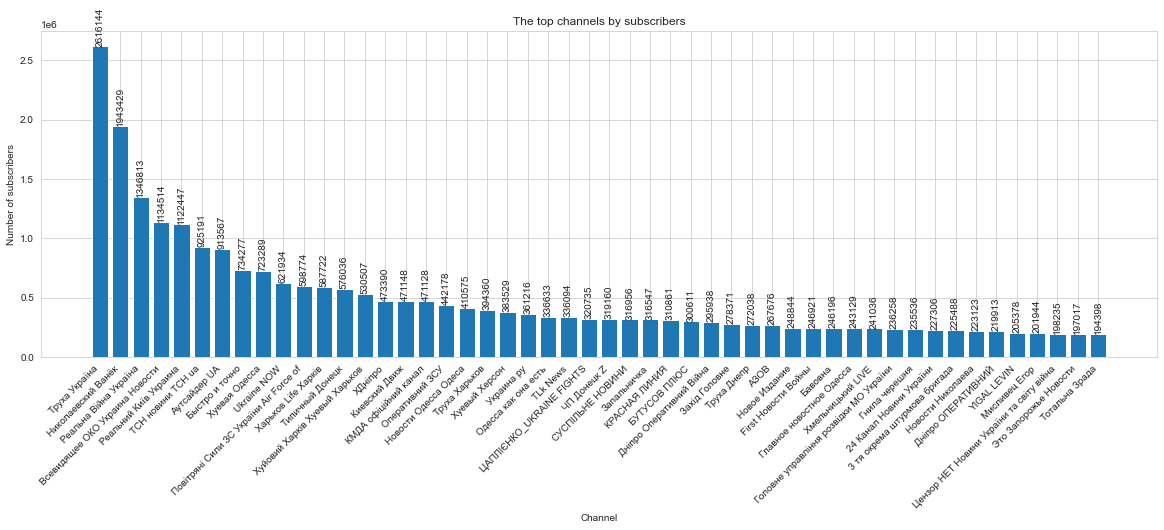

In [33]:
plt.figure(figsize=(20,6))
bars = plt.bar(top_50_channels_per_part["name"], top_50_channels_per_part["n_participants"])
plt.title("The top channels by subscribers")
plt.xlabel("Channel")
plt.ylabel("Number of subscribers")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', rotation='vertical')

plt.show()

The channels also are not normally distributed per numbers of the subscribers. The smallest number of the channels have the large amount of the subscribers. There are only 5 channels with the number of subscribers more than million: "Труха Україна" (2 616 144 sub.), "Николаевский Ванёк" (1 943 429 sub), "Реальна війна Україна" (1 346 813 sub), "Всевидящее ОКО Украина Новости" (1 134 514 sub), "Реальний Київ Україна" (1 122 447 sub).

##### Data of the post analisys

In [34]:
# The number of the messages per days
df["message_create_date"].dt.floor('d').value_counts()

2023-10-05    35865
2023-10-06    34489
2023-12-29    32079
2023-12-14    22500
2023-10-07    21491
              ...  
2023-10-14    13303
2023-12-10    13220
2023-12-09    13153
2023-11-19    12560
2023-11-12    12454
Name: message_create_date, Length: 92, dtype: int64

C:\Windows\Temp\ipykernel_9812\1610175148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['message_create_date'].dt.to_period('M')


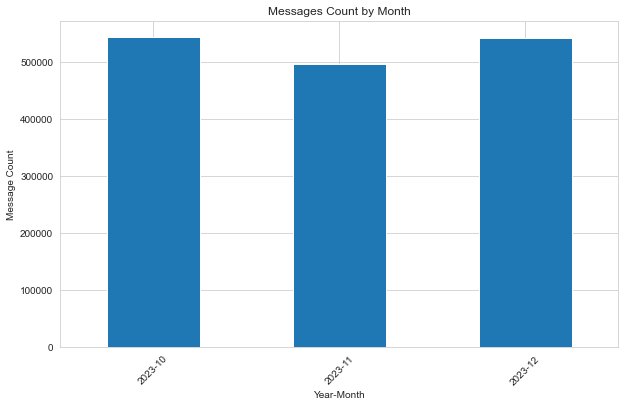

In [35]:
# The number of the messages per months
df['year_month'] = df['message_create_date'].dt.to_period('M')
messages_by_month = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
messages_by_month.plot(kind="bar")
plt.title("Messages Count by Month")
plt.xlabel("Year-Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()

The number of messages are almost equally divide per three months.

<Figure size 1440x576 with 0 Axes>

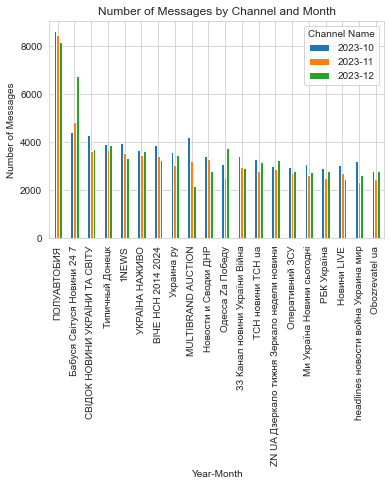

In [36]:
# The number of the messages per months and per Top-20 channels
top_20_channels = df["name"].value_counts().nlargest(20).index
df_top20 = df[df["name"].isin(top_20_channels)].copy()
df_top20['year_month'] = df_top20['message_create_date'].dt.to_period('M')
messages_by_channel_month = df_top20.groupby(['name', 'year_month']).size().unstack(fill_value=0)
# Sort the DataFrame by the sum of messages for each channel in ascending order
messages_by_channel_month = messages_by_channel_month.loc[messages_by_channel_month.sum(axis=1).sort_values(ascending=False).index]

# Plot the bar chart
plt.figure(figsize=(20, 8))
messages_by_channel_month.plot(kind='bar', stacked=False)
plt.title('Number of Messages by Channel and Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Messages')
plt.legend(title='Channel Name')
plt.show()

In the largest channels per messages the messages almost equally devided per month except for "Бабуся Світуся Новини 24 7" where the number of the messages increased each month (probably, the channel is new, developed or began to deliver content paid for by someone) and "MULTIBRAND AUCTION" where the number of the messages decreased each month (probably, the channel pauses its operations).

##### Messages analysis

In [38]:
df['length'].value_counts().median()

38.0

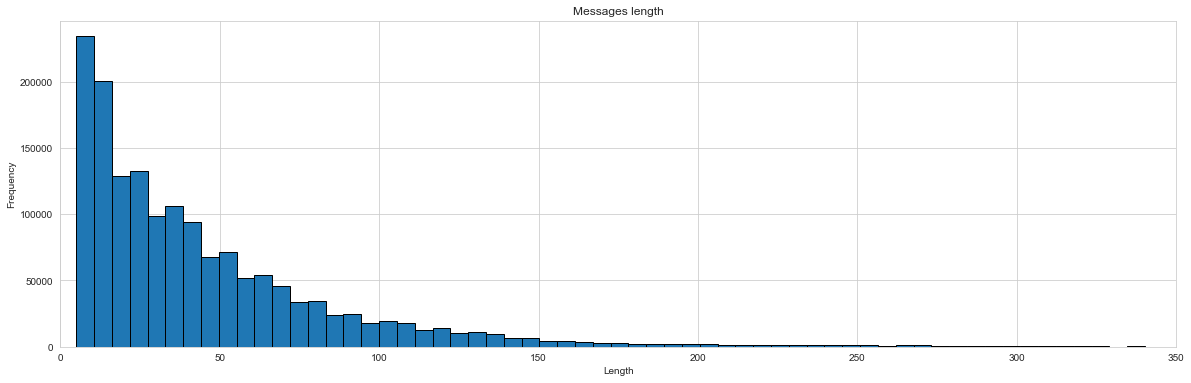

In [39]:
# The length of the messages
plt.figure(figsize= (20,6))
plt.hist(df["length"], bins=150, edgecolor='black')
plt.title("Messages length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.xlim(0, 350)
plt.show()

The most often the length of the messages is from 5 to 15 tokens. 

In [40]:
# Calculate duplicates
duplicate_rows = df.duplicated(subset=['message_content_clean'], keep=False)
df['is_duplicate'] = duplicate_rows.astype(int)      # Assign 1 to rows that are duplicates and 0 to rows that are not duplicates
print("Number of duplicates in 'message' column:", df["is_duplicate"].sum())

Number of duplicates in 'message' column: 354491


C:\Windows\Temp\ipykernel_9812\3174833736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_duplicate'] = duplicate_rows.astype(int)      # Assign 1 to rows that are duplicates and 0 to rows that are not duplicates


##### Language of the messages

In [41]:
def langdetect(text):
    try:
        language = detect(text)
    except:
        language = "none"
    return language

In [42]:
%%time
df["lang"] = df["message_content_clean"].progress_apply(lambda x: langdetect(x))

100%|██████████| 1584437/1584437 [1:19:46<00:00, 331.01it/s]

CPU times: total: 50min 26s
Wall time: 1h 19min 46s



<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
df.groupby("lang").size()

lang
af           28
bg         4921
ca            5
cs            7
da            5
de           28
en        12243
es         3175
et          622
fi            7
fr            3
hr           14
hu            1
id          139
it           15
lt            2
lv            2
mk         1591
nl            3
no           17
none         23
pl            7
pt            2
ro            5
ru       426000
sk           81
sl           25
so           34
sq           43
sv           15
sw            8
tl           12
tr           20
uk      1135332
vi            2
dtype: int64

Text(0.5, 0, 'Language')

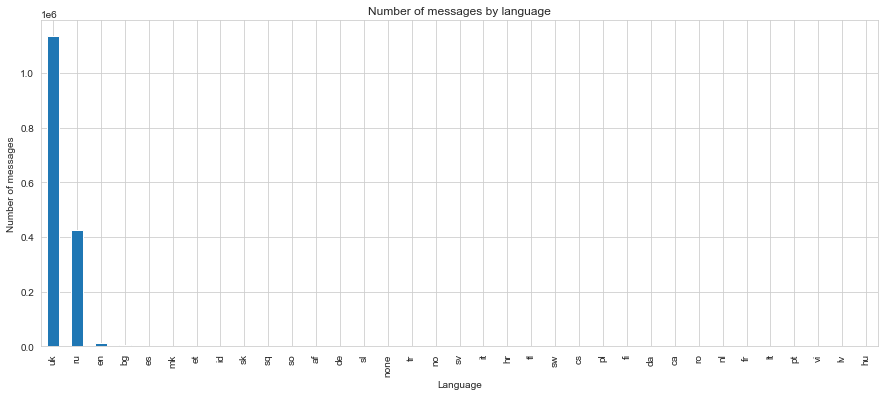

In [47]:
# Show the number of messages by language
df.lang.value_counts().plot(kind='bar', figsize=(15,6))
plt.title("Number of messages by language")
plt.ylabel('Number of messages')
plt.xlabel('Language')

In [48]:
en_lang = df[df["lang"]=='en']
en_lang["channel_name"].value_counts()

WarriorsUkrainian           3881
KyivIndependent_official    3318
United24media               1884
combat_ftg                  1009
ConflictChronicles           801
                            ... 
oldschoolpravda                1
corona_kyiv                    1
SK_DM_SK                       1
obolonlife                     1
fayno_chernigiv                1
Name: channel_name, Length: 195, dtype: int64

In [181]:
df.to_csv(os.path.join(root_dir, "data_preprocessed.csv"))

#### Ukrainian channels data analyses

In [49]:
# Choose only posts in Ukrainian
uk_lang = df[df["lang"]=='uk']
len(uk_lang)

1135332

In [52]:
uk_lang["name"].value_counts().median()

877.0

Text(0, 0.5, 'Frequency')

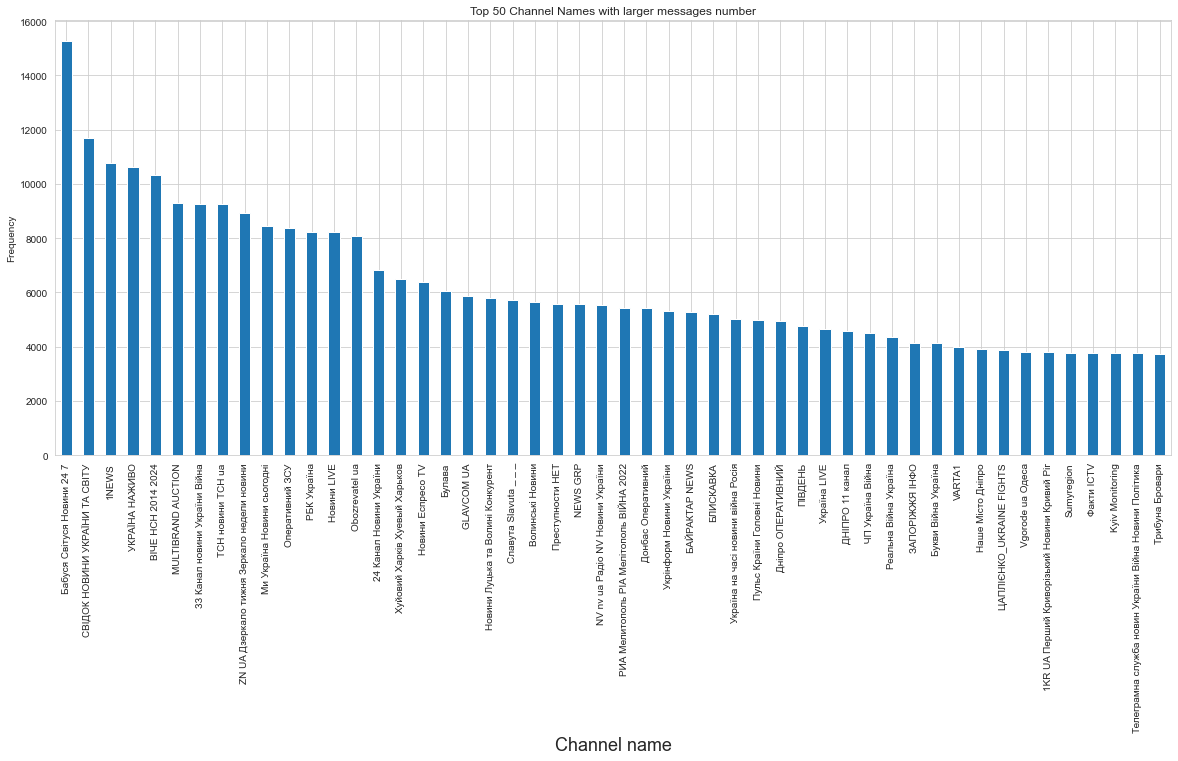

In [51]:
# Top 50 channels by number of messages
top_50_channels = uk_lang["name"].value_counts().nlargest(50)
plt.figure(figsize=(20,8))
top_50_channels.plot(kind="bar")
plt.title("Top 50 Channel Names with larger messages number")
plt.xlabel("Channel name", fontsize=18)
plt.ylabel("Frequency")

The largest amount of the messages have channels "Бабуся Світуся Новини 24/7", "СВІДОК НОВИНИ УКРАЇНИ ТА СВІТУ", "1NEWS" and "УКРФЇНА НАЖИВО". 

In [60]:
# Top 50 channels by subscribers
df_n_participants = uk_lang.groupby(['name', 'n_participants']).size().reset_index(name='n_messages')
top_50_channels_per_part_uk = df_n_participants.nlargest(50,"n_participants")
top_50_channels_per_part

,name,n_participants,n_messages
766,Труха Україна,2616144,2717
482,Николаевский Ванёк,1943429,241
630,Реальна Війна Україна,1346813,4363
234,Всевидящее ОКО Украина Новости,1134514,801
632,Реальний Київ Украина,1122447,2939
710,ТСН новини ТСН ua,925191,9253
177,Аутсайдер UA,913567,186
214,Быстро и точно,734277,1
834,Хуевая Одесса,723289,99
117,Ukraine NOW,621934,3306


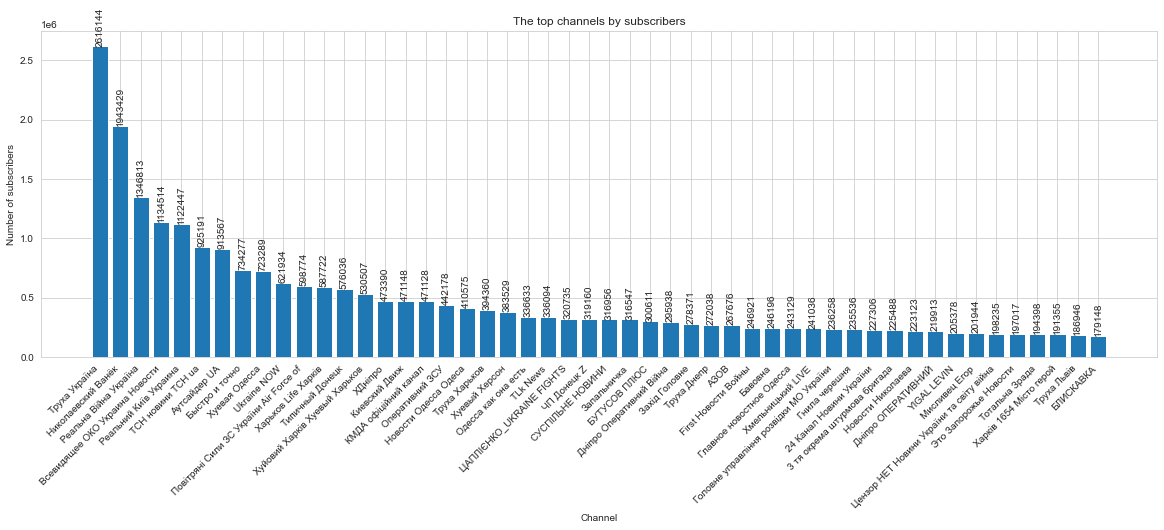

In [55]:
plt.figure(figsize=(20,6))
bars = plt.bar(top_50_channels_per_part["name"], top_50_channels_per_part["n_participants"])
plt.title("The top channels by subscribers")
plt.xlabel("Channel")
plt.ylabel("Number of subscribers")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', rotation='vertical')

plt.show()

The top channels by subscribers are the same as for full dataset.

#### pro_russian channels

The list of the pro-russian channels from Detector.Media (https://detector.media/monitorynh-internetu/article/205954/2022-12-14-kremlivska-gidra-300-telegram-kanaliv-yaki-otruyuyut-ukrainskyy-infoprostir/). , (https://detector.media/monitorynh-internetu/article/198960/2022-05-05-teper-zazhyvem-yak-i-dlya-chogo-rosiya-stvoryla-merezhu-telegram-kanaliv-dlya-okupovanykh-neyu-terytoriy/), Chesno (https://www.chesno.org/post/5688/), CCD (https://cpd.gov.ua/en/warnings/ccd-announces-an-updated-list-of-infoterrorist-channels-operating-in-ukraine/), and all the channels that contains the words "Труха, Общественное движение, Главное в..., Администрация..., Z, _ru, _rus) based on the Detector.Media recommendation.


In [63]:
pro_russian_channel = pd.read_excel("C:/N/st/UCU/5sem2024_DIPLOMA/Manipulation/code/teleg_news_channels/pro-russian_channels.xlsx")
pro_russian_channel

,channel,channel_correct,source,year
0,"""Лисичанск - колыбель Донбасса""",Лисичанск колыбель Донбасса,detector.media,2022.0
1,"93 бригада ""Холодній Яр"" ОБРАТНАЯ СТОРОНА",93 бригада Холодній Яр ОБРАТНАЯ СТОРОНА,Центр протидії дезінформації при РНБО,2022.0
2,DeZa ДОНБАСС,DeZa ДОНБАСС,detector.media,2022.0
3,Dirty Harry Игорь Гомольский,Dirty Harry Игорь Гомольский,Центр протидії дезінформації при РНБО,2022.0
4,Elena Lukash,Elena Lukash,detector.media,2022.0
...,...,...,...,...
249,Луцьк Труха,Луцьк Труха,detector.media,NaN
250,Ужгород Труха,Ужгород Труха,detector.media,NaN
251,Труха Киев,Труха Киев,detector.media,NaN
252,Труха Суми,Труха Суми,detector.media,NaN


In [64]:
pro_russian_channel = pro_russian_channel["channel_correct"].tolist()
df['is_pro-Russian_channel'] = df["name"].isin(pro_russian_channel).astype(int)

C:\Windows\Temp\ipykernel_9812\2341677952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_pro-Russian_channel'] = df["name"].isin(pro_russian_channel).astype(int)


In [73]:
print("Number of posts in pro-Russian channels:", df["is_pro-Russian_channel"].sum())

Number of posts in pro-Russian channels: 128722


In [72]:
pro_russian_channel_in_df = df[df['is_pro-Russian_channel'] == 1]
print("Number of pro-Russian channels:", pro_russian_channel_in_df["channel_name"].nunique())

Number of pro-Russian channels: 60
